In [1]:
%pip install scikit-learn
#%pip install imblearn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Importing necessary libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import joblib

PREDICTION MODEL CREATION


In [3]:
# Read the CSV file
df = pd.read_csv("../dataset/origs.csv")

# Print the number of NaN values in each column


# Drop rows with NaN values in the 'total_laid_off' and 'Reason for layoffs' columns
df.dropna(subset=['total_laid_off', 'Reason for layoffs'], inplace=True)

# Preprocess the data
features = ['company', 'industry', 'date', 'country', 'total_laid_off']
X = df[features]
y = df['Reason for layoffs']  # Target variable

print(df.isna().sum())
# Convert categorical features to numerical using CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X.astype(str).apply(lambda x: ' '.join(x), axis=1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


company                  0
location                 0
industry                 0
total_laid_off           0
percentage_laid_off    597
date                     0
stage                    3
country                  0
funds_raised           198
Reason for layoffs       0
dtype: int64


In [4]:
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [5]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.7957244655581948

Classification Report:
                       precision    recall  f1-score   support

   decreasing demand       0.00      0.00      0.00        56
   economic downturn       0.73      1.00      0.84       231
     pandemic impact       1.00      0.99      1.00       105
profitability shifts       0.00      0.00      0.00        29

            accuracy                           0.80       421
           macro avg       0.43      0.50      0.46       421
        weighted avg       0.65      0.80      0.71       421



c:\Users\oknor\OneDrive\Documents\GitHub\layoffs\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\oknor\OneDrive\Documents\GitHub\layoffs\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\oknor\OneDrive\Documents\GitHub\layoffs\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [6]:
# Save the model for future use
joblib.dump(model, '../models/layoffs_reason_model.joblib')



['../models/layoffs_reason_model.joblib']

In [7]:
# Load the saved model
loaded_model = joblib.load('../models/layoffs_reason_model.joblib')

# Create new data for testing (excluding 'extra_column')
new_data = {
    'company_name': ['Salesforce', 'Paytm'],
    'industry': ['Sales', 'Finance'],
    'date': ['2024-01-01', '2024-01-01'],
    'country': ['United States', 'United States'],
    'total_laid_off': [8000,12000],
}

new_df = pd.DataFrame(new_data)

# Preprocess the new data
new_X_vectorized = vectorizer.transform(new_df.astype(str).apply(lambda x: ' '.join(x), axis=1))

# Make predictions on the new data
new_predictions = loaded_model.predict(new_X_vectorized)

# Display the predictions
predictions_df = pd.DataFrame({'Company': new_data['company_name'], 'Predicted_Reason': new_predictions})
print('\nPredictions on New Data:\n', predictions_df)



Predictions on New Data:
       Company   Predicted_Reason
0  Salesforce  economic downturn
1       Paytm  economic downturn


In [8]:
# Evaluate the model
print("\nEvaluation Metrics:")
print(f'Accuracy: {accuracy}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = model.classes_

# Display Confusion Matrix with Labels
print('\nConfusion Matrix:')
print(f'{"True Labels":<20}', end="")
print("Predicted Labels")
print("="*45)
for i, row in enumerate(conf_matrix):
    print(f'{class_labels[i]:<20}', end="")
    print(row)




Evaluation Metrics:
Accuracy: 0.7957244655581948

Classification Report:
                       precision    recall  f1-score   support

   decreasing demand       0.00      0.00      0.00        56
   economic downturn       0.73      1.00      0.84       231
     pandemic impact       1.00      0.99      1.00       105
profitability shifts       0.00      0.00      0.00        29

            accuracy                           0.80       421
           macro avg       0.43      0.50      0.46       421
        weighted avg       0.65      0.80      0.71       421


Confusion Matrix:
True Labels         Predicted Labels
decreasing demand   [ 0 56  0  0]
economic downturn   [  0 231   0   0]
pandemic impact     [  0   1 104   0]
profitability shifts[ 0 29  0  0]


c:\Users\oknor\OneDrive\Documents\GitHub\layoffs\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\oknor\OneDrive\Documents\GitHub\layoffs\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\oknor\OneDrive\Documents\GitHub\layoffs\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [9]:
# Cross-Validation
cv_scores = cross_val_score(model, X_vectorized, y, cv=5)
print('\nCross-Validation Scores:', cv_scores)

# Bias Assessment
# Check class distribution in the target variable
class_distribution = df['Reason for layoffs'].value_counts(normalize=True)
print('\nClass Distribution:')
print(class_distribution)

# Explore bias across different subgroups (e.g., industries)
subgroup_bias = df.groupby('industry')['Reason for layoffs'].value_counts(normalize=True).unstack()
print('\nSubgroup Bias (Industry):')
print(subgroup_bias)



Cross-Validation Scores: [0.80285036 0.80522565 0.78095238 0.78809524 0.7952381 ]

Class Distribution:
Reason for layoffs
economic downturn       0.573264
pandemic impact         0.235490
decreasing demand       0.122740
profitability shifts    0.068506
Name: proportion, dtype: float64

Subgroup Bias (Industry):
Reason for layoffs  decreasing demand  economic downturn  pandemic impact  \
industry                                                                    
AI                                NaN                NaN              NaN   
Aerospace                         NaN           0.428571         0.428571   
Construction                 0.090909           0.363636         0.545455   
Consumer                     0.158879           0.485981         0.261682   
Crypto                       0.194805           0.727273         0.012987   
Data                         0.134328           0.522388         0.283582   
Education                    0.238636           0.522727         0.15

In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np
from imblearn.over_sampling import RandomOverSampler


# Preprocess the data
features = ['company', 'industry', 'date', 'country', 'total_laid_off']
X = df[features]
y = df['Reason for layoffs']

# Convert categorical features to numerical using CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X.astype(str).apply(lambda x: ' '.join(x), axis=1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Address Class Imbalance using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Experiment with Different Models (Random Forest)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Hyperparameter Tuning using GridSearchCV
param_grid = {'alpha': [0.1, 1.0, 10.0]}
nb_model = MultinomialNB()
grid_search = GridSearchCV(nb_model, param_grid, cv=5)
grid_search.fit(X_resampled, y_resampled)
best_nb_model = grid_search.best_estimator_

# Ensemble Methods (Voting Classifier)
from sklearn.ensemble import VotingClassifier
ensemble_model = VotingClassifier(estimators=[('nb', best_nb_model), ('rf', rf_model)], voting='soft')
ensemble_model.fit(X_resampled, y_resampled)

# Evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print('\nClassification Report:\n', classification_report(y_test, y_pred))
    print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
    cv_scores = cross_val_score(model, X_vectorized, y, cv=5)
    print('\nCross-Validation Scores:', cv_scores)

# Evaluate Naive Bayes model
print("Evaluation Metrics for Naive Bayes:")
evaluate_model(best_nb_model, X_test, y_test)

# Evaluate Random Forest model
print("\nEvaluation Metrics for Random Forest:")
evaluate_model(rf_model, X_test, y_test)

# Evaluate Ensemble model
print("\nEvaluation Metrics for Ensemble:")
evaluate_model(ensemble_model, X_test, y_test)

# Bias Assessment
# Check class distribution in the target variable
class_distribution = df['Reason for layoffs'].value_counts(normalize=True)
print('\nClass Distribution:')
print(class_distribution)

# Explore bias across different subgroups (e.g., industries)
subgroup_bias = df.groupby('industry')['Reason for layoffs'].value_counts(normalize=True).unstack()
print('\nSubgroup Bias (Industry):')
subgroup_bias_cleaned = subgroup_bias.dropna()
print(subgroup_bias_cleaned)


Evaluation Metrics for Naive Bayes:
Accuracy: 0.6935866983372921

Classification Report:
                       precision    recall  f1-score   support

   decreasing demand       0.48      0.55      0.51        56
   economic downturn       0.77      0.63      0.69       231
     pandemic impact       0.99      0.99      0.99       105
profitability shifts       0.18      0.38      0.24        29

            accuracy                           0.69       421
           macro avg       0.60      0.64      0.61       421
        weighted avg       0.74      0.69      0.71       421


Confusion Matrix:
 [[ 31  25   0   0]
 [ 34 146   1  50]
 [  0   1 104   0]
 [  0  18   0  11]]

Cross-Validation Scores: [0.64133017 0.65558195 0.62857143 0.62619048 0.73571429]

Evaluation Metrics for Random Forest:
Accuracy: 0.8147268408551069

Classification Report:
                       precision    recall  f1-score   support

   decreasing demand       0.60      0.77      0.67        56
   economic d

In [11]:
# Save the model for future use
joblib.dump(rf_model, '../models/layoffs_reason_rfmodel.joblib')

['layoffs_reason_rfmodel.joblib']

In [12]:
# Load the saved model
loaded_model = joblib.load('../models/layoffs_reason_rfmodel.joblib')

# Create new data for testing (excluding 'extra_column')
new_data = {
    'company_name': ['Salesforce', 'Unacademy'],
    'industry': ['Sales', 'Education'],
    'date': ['2024-01-01', '2024-06-29'],
    'country': ['United States', 'India'],
    'total_laid_off': [8000,1200],
}

new_df = pd.DataFrame(new_data)

# Preprocess the new data
new_X_vectorized = vectorizer.transform(new_df.astype(str).apply(lambda x: ' '.join(x), axis=1))

# Make predictions on the new data
new_predictions = loaded_model.predict(new_X_vectorized)

# Display the predictions
predictions_df = pd.DataFrame({'Company': new_data['company_name'], 'Predicted_Reason': new_predictions})
print('\nPredictions on New Data:\n', predictions_df)


Predictions on New Data:
       Company   Predicted_Reason
0  Salesforce  economic downturn
1   Unacademy  decreasing demand


In [13]:
# Save the model for future use
joblib.dump(ensemble_model, '../models/layoffs_reason_ensemble_model.joblib')


['layoffs_reason_ensemble_model.joblib']

In [14]:
# Load the saved model
loaded_model = joblib.load('../models/layoffs_reason_ensemble_model.joblib')

# Create new data for testing (excluding 'extra_column')
new_data = {
    'company_name': ['Salesforce', 'Rigup'],
    'industry': ['Sales', 'Energy'],
    'date': ['2024-01-01', '2024-10-10'],
    'country': ['United States', 'United States'],
    'total_laid_off': [8000,12000],
}

new_df = pd.DataFrame(new_data)

# Preprocess the new data
new_X_vectorized = vectorizer.transform(new_df.astype(str).apply(lambda x: ' '.join(x), axis=1))

# Make predictions on the new data
new_predictions = loaded_model.predict(new_X_vectorized)

# Display the predictions
predictions_df = pd.DataFrame({'Company': new_data['company_name'], 'Predicted_Reason': new_predictions})
print('\nPredictions on New Data:\n', predictions_df)


Predictions on New Data:
       Company      Predicted_Reason
0  Salesforce     economic downturn
1       Rigup  profitability shifts




Evaluation Metrics for Naive Bayes:
Accuracy: 0.6935866983372921

Classification Report:
                       precision    recall  f1-score   support

   decreasing demand       0.48      0.55      0.51        56
   economic downturn       0.77      0.63      0.69       231
     pandemic impact       0.99      0.99      0.99       105
profitability shifts       0.18      0.38      0.24        29

            accuracy                           0.69       421
           macro avg       0.60      0.64      0.61       421
        weighted avg       0.74      0.69      0.71       421


Confusion Matrix:
 [[ 31  25   0   0]
 [ 34 146   1  50]
 [  0   1 104   0]
 [  0  18   0  11]]

Cross-Validation Scores: [0.64133017 0.65558195 0.62857143 0.62619048 0.73571429]


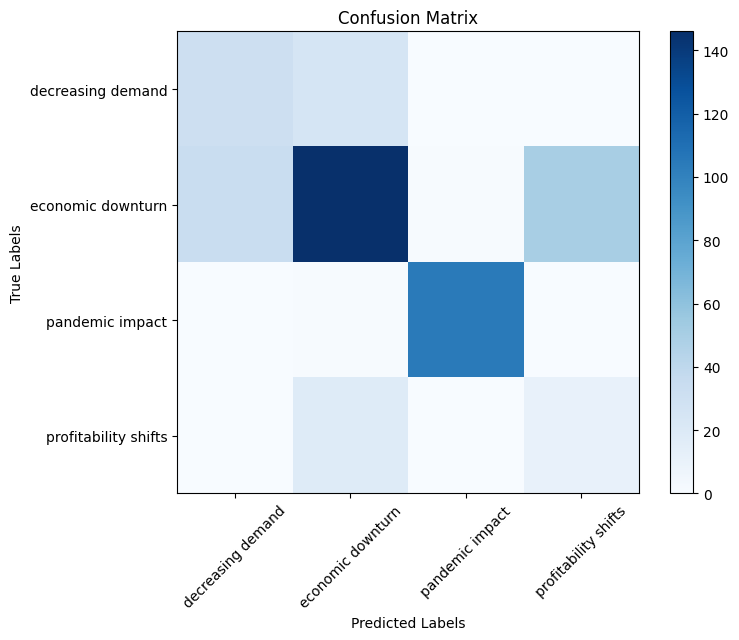

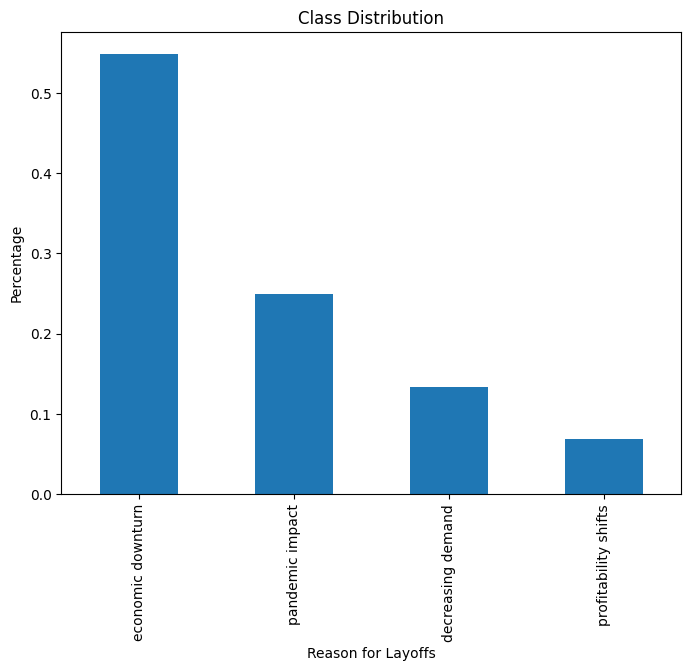





Evaluation Metrics for Random Forest:
Accuracy: 0.8147268408551069

Classification Report:
                       precision    recall  f1-score   support

   decreasing demand       0.60      0.77      0.67        56
   economic downturn       0.83      0.83      0.83       231
     pandemic impact       0.98      1.00      0.99       105
profitability shifts       0.31      0.14      0.19        29

            accuracy                           0.81       421
           macro avg       0.68      0.68      0.67       421
        weighted avg       0.80      0.81      0.81       421


Confusion Matrix:
 [[ 43  13   0   0]
 [ 29 191   2   9]
 [  0   0 105   0]
 [  0  25   0   4]]

Cross-Validation Scores: [0.80997625 0.81947743 0.7547619  0.6952381  0.79047619]


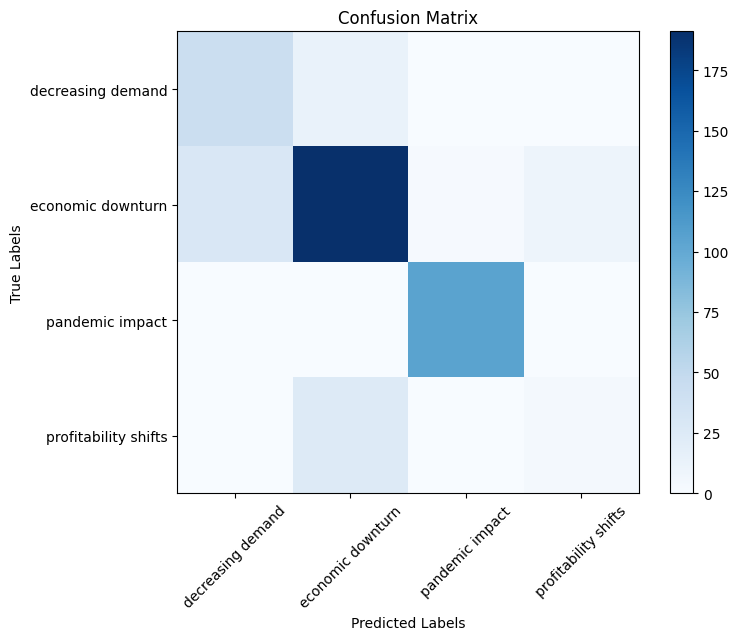

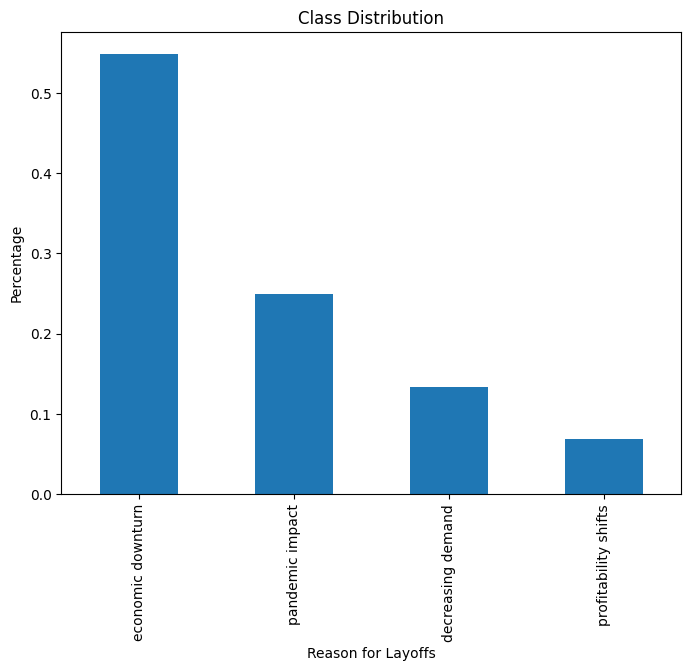


Predictions on New Data With The Best among the models (RF MODEL):
       Company   Predicted_Reason
0  Salesforce  economic downturn
1   Unacademy  decreasing demand

Class Distribution:
Reason for layoffs
economic downturn       0.573264
pandemic impact         0.235490
decreasing demand       0.122740
profitability shifts    0.068506
Name: proportion, dtype: float64

Subgroup Bias (Industry):
Reason for layoffs  decreasing demand  economic downturn  pandemic impact  \
industry                                                                    
Consumer                     0.158879           0.485981         0.261682   
Crypto                       0.194805           0.727273         0.012987   
Data                         0.134328           0.522388         0.283582   
Education                    0.238636           0.522727         0.159091   
Energy                       0.300000           0.300000         0.200000   
Finance                      0.145522           0.574627     

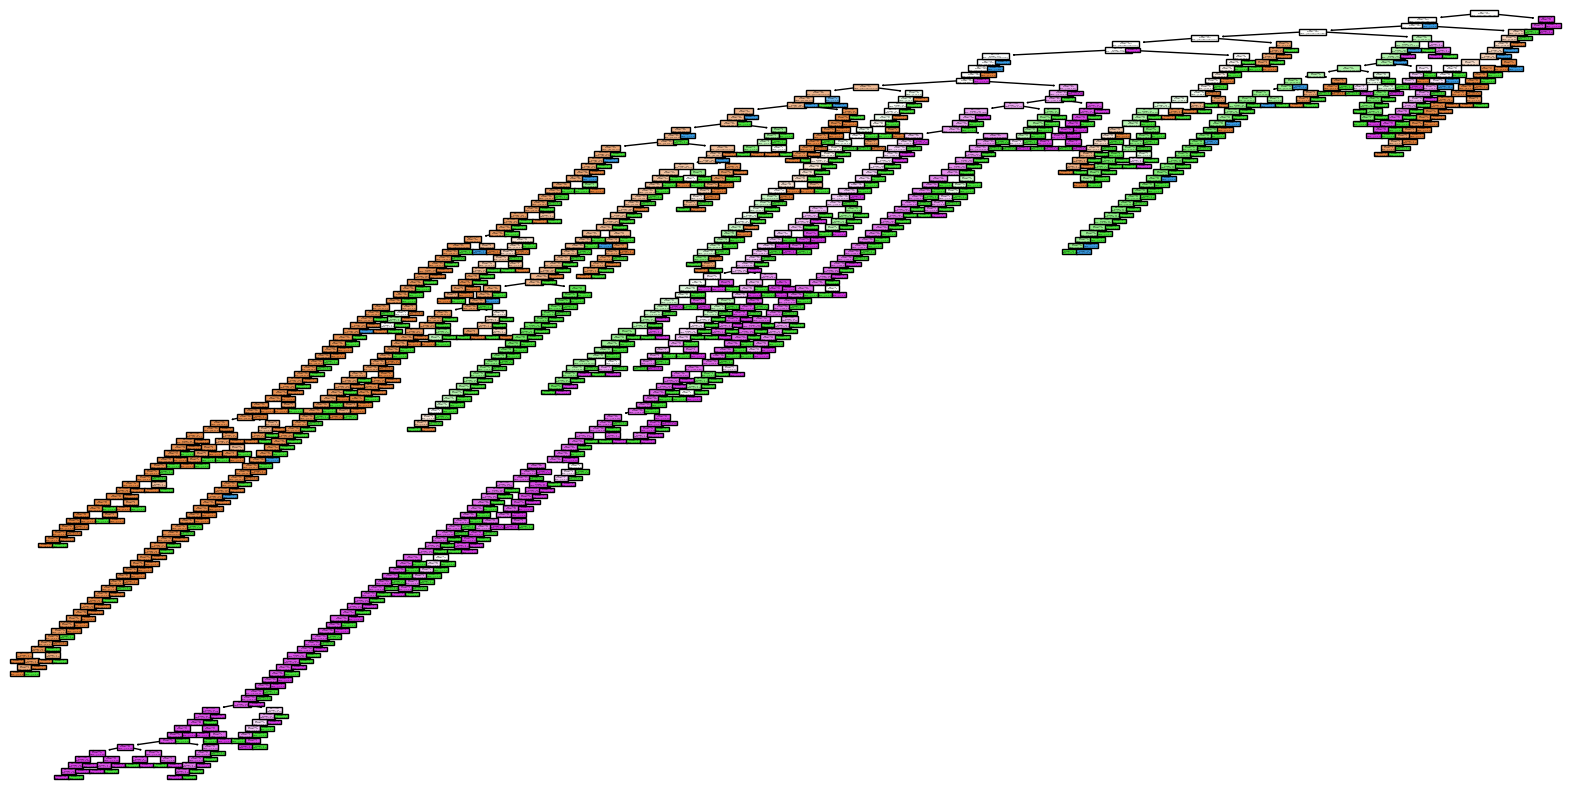

In [15]:
# Import necessary libraries111
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# Preprocess the data
features = ['company', 'industry', 'date', 'country', 'total_laid_off']
X = df[features]
y = df['Reason for layoffs']

# Convert categorical features to numerical using CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X.astype(str).apply(lambda x: ' '.join(x), axis=1))
feature_names = vectorizer.get_feature_names_out()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Address Class Imbalance using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Experiment with Different Models (Random Forest)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)


print('\n')


# Hyperparameter Tuning using GridSearchCV
param_grid = {'alpha': [0.1, 1.0, 10.0]}
nb_model = MultinomialNB()
grid_search = GridSearchCV(nb_model, param_grid, cv=5)
grid_search.fit(X_resampled, y_resampled)
best_nb_model = grid_search.best_estimator_

# Evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print('\nClassification Report:\n', classification_report(y_test, y_pred))
    print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
    cv_scores = cross_val_score(model, X_vectorized, y, cv=5)
    print('\nCross-Validation Scores:', cv_scores)

    # Visualize Confusion Matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix(y_test, y_pred), cmap='Blues', interpolation='nearest')
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(model.classes_))
    plt.xticks(tick_marks, model.classes_, rotation=45)
    plt.yticks(tick_marks, model.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Add space between visualizations
    print('\n\n')

    # Visualize Class Distribution
    plt.figure(figsize=(8, 6))
    class_distribution = y_test.value_counts(normalize=True)
    class_distribution.plot(kind='bar')
    plt.title('Class Distribution')
    plt.xlabel('Reason for Layoffs')
    plt.ylabel('Percentage')
    plt.show()

# Evaluate Naive Bayes model
print("Evaluation Metrics for Naive Bayes:")
evaluate_model(best_nb_model, X_test, y_test)

# Add space between models
print('\n\n')

# Evaluate Random Forest model
print("\nEvaluation Metrics for Random Forest:")
evaluate_model(rf_model, X_test, y_test)

#save the model
joblib.dump(rf_model, 'layoffs_reason_rfmodel.joblib')

# Load the saved model
loaded_model = joblib.load('layoffs_reason_rfmodel.joblib')

# Create new data for testing (excluding 'extra_column')
new_data = {
    'company_name': ['Salesforce', 'Unacademy'],
    'industry': ['Sales', 'Education'],
    'date': ['2024-01-01', '2024-06-29'],
    'country': ['United States', 'India'],
    'total_laid_off': [8000,1200],
}

new_df = pd.DataFrame(new_data)

# Preprocess the new data
new_X_vectorized = vectorizer.transform(new_df.astype(str).apply(lambda x: ' '.join(x), axis=1))

# Make predictions on the new data
new_predictions = loaded_model.predict(new_X_vectorized)

# Display the predictions
predictions_df = pd.DataFrame({'Company': new_data['company_name'], 'Predicted_Reason': new_predictions})
print('\nPredictions on New Data With The Best among the models (RF MODEL):\n', predictions_df)

# Bias Assessment
# Check class distribution in the target variable
class_distribution = df['Reason for layoffs'].value_counts(normalize=True)
print('\nClass Distribution:')
print(class_distribution)

# Explore bias across different subgroups (e.g., industries)
subgroup_bias = df.groupby('industry')['Reason for layoffs'].value_counts(normalize=True).unstack()
print('\nSubgroup Bias (Industry):')
subgroup_bias_cleaned = subgroup_bias.dropna()
print(subgroup_bias_cleaned)

plt.figure(figsize=(20,10))
plot_tree(rf_model.estimators_[0], feature_names=feature_names, filled=True)
plt.show()